# Data Cleaning

## Importing libraries & checking the data

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('gpu_metadata.csv')

df2 = pd.read_csv('gpu_price_history.csv')

In [2]:
print(df1.head())

                     Name Wattage VRAM  3DMARK
0        GeForce GTX 1050     75W  2GB    1861
1     GeForce GTX 1050 Ti     75W  4GB    2356
2        GeForce GTX 1060    120W  6GB    4215
3        GeForce GTX 1650     75W  4GB    3552
4  GeForce GTX 1660 SUPER    125W  6GB    6078


In [3]:
print(df2.head())

       Date              Name  Retail Price  Used Price
0  01-01-24  GeForce GTX 1050             0           0
1  01-02-24  GeForce GTX 1050             0           0
2  01-03-23  GeForce GTX 1050           192          61
3  01-03-24  GeForce GTX 1050           254          52
4  01-04-23  GeForce GTX 1050           181          55


## Cleaning the data

In [4]:
#checking the dataframes for duplicates
print(df1.duplicated().sum())

print(df2.duplicated().sum())

0
0


In [5]:
print(df1.shape)

print(df1.dtypes)

(48, 4)
Name       object
Wattage    object
VRAM       object
3DMARK      int64
dtype: object


In [6]:
print(df2.shape)

print(df2.dtypes)

(1087, 4)
Date            object
Name            object
Retail Price     int64
Used Price       int64
dtype: object


In [7]:
df1['VRAM'] = df1['VRAM'].str.replace('GB', '', regex=True).astype(int)

print(df1.head())

                     Name Wattage  VRAM  3DMARK
0        GeForce GTX 1050     75W     2    1861
1     GeForce GTX 1050 Ti     75W     4    2356
2        GeForce GTX 1060    120W     6    4215
3        GeForce GTX 1650     75W     4    3552
4  GeForce GTX 1660 SUPER    125W     6    6078


In [8]:
df1['Wattage'] = df1['Wattage'].str.replace('W', '', regex=True).astype(int)

print(df1.head())

                     Name  Wattage  VRAM  3DMARK
0        GeForce GTX 1050       75     2    1861
1     GeForce GTX 1050 Ti       75     4    2356
2        GeForce GTX 1060      120     6    4215
3        GeForce GTX 1650       75     4    3552
4  GeForce GTX 1660 SUPER      125     6    6078


In [9]:
df1.dtypes

Name       object
Wattage     int32
VRAM        int32
3DMARK      int64
dtype: object

In [10]:
df1.describe()

Wattage       VRAM        3DMARK
count   48.000000  48.000000     48.000000
mean   200.958333  10.187500  12561.916667
std     94.543463   5.774693   8629.770759
min     50.000000   2.000000   1195.000000
25%    123.750000   6.000000   4816.250000
50%    190.000000   8.000000  11561.500000
75%    268.500000  13.000000  19288.250000
max    450.000000  24.000000  35966.000000

In [11]:
df2.describe()

Retail Price   Used Price
count   1087.000000  1087.000000
mean     478.281509   312.383625
std      412.893707   306.037560
min        0.000000     0.000000
25%      211.500000    90.000000
50%      339.000000   235.000000
75%      611.000000   425.000000
max     2229.000000  2119.000000

In [12]:
#getting rid of unneccessary whitespaces

df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# Remove whitespaces from all string values in the rows
df1 = df1.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df2 = df2.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Verify the changes
print(df1.head())
print(df2.head())

                     Name  Wattage  VRAM  3DMARK
0        GeForce GTX 1050       75     2    1861
1     GeForce GTX 1050 Ti       75     4    2356
2        GeForce GTX 1060      120     6    4215
3        GeForce GTX 1650       75     4    3552
4  GeForce GTX 1660 SUPER      125     6    6078
       Date              Name  Retail Price  Used Price
0  01-01-24  GeForce GTX 1050             0           0
1  01-02-24  GeForce GTX 1050             0           0
2  01-03-23  GeForce GTX 1050           192          61
3  01-03-24  GeForce GTX 1050           254          52
4  01-04-23  GeForce GTX 1050           181          55


In [13]:
#checks for null values
df1.isnull().sum()

Name       0
Wattage    0
VRAM       0
3DMARK     0
dtype: int64

In [14]:
df2.isnull().sum()

Date            0
Name            0
Retail Price    0
Used Price      0
dtype: int64

# Data exploration

In [15]:
df1.sort_values(by=['3DMARK'], ascending=False)

Name  Wattage  VRAM  3DMARK
23           GeForce RTX 4090      450    24   35966
47         Radeon RX 7900 XTX      355    24   29246
22     GeForce RTX 4080 SUPER      320    16   28531
46          Radeon RX 7900 XT      315    20   25617
21  GeForce RTX 4070 Ti SUPER      285    16   24426
20        GeForce RTX 4070 Ti      285    12   22706
45         Radeon RX 7900 GRE      260    16   21644
19     GeForce RTX 4070 SUPER      220    12   21214
40          Radeon RX 6900 XT      300    16   20621
15           GeForce RTX 3090      350    24   19901
44          Radeon RX 7800 XT      263    16   19839
14        GeForce RTX 3080 Ti      350    12   19592
39          Radeon RX 6800 XT      300    16   19187
18           GeForce RTX 4070      200    12   17846
13           GeForce RTX 3080      320    10   17656
43          Radeon RX 7700 XT      245    12   17245
38             Radeon RX 6800      250    16   15972
12        GeForce RTX 3070 Ti      290     8   14831
7         GeForce RTX 2080 Ti      250    11   14628
11           GeForce RTX 3070      220     8   13663
37          Radeon RX 6750 XT      250    12   13595
17        GeForce RTX 4060 Ti      160     8   13462
36          Radeon RX 6700 XT      230    12   12808
10        GeForce RTX 3060 Ti      200     8   11744
42          Radeon RX 7600 XT      190    16   11379
41             Radeon RX 7600      165     8   10817
16           GeForce RTX 4060      115     8   10630
35          Radeon RX 6650 XT      176     8   10027
34          Radeon RX 6600 XT      160     8    9707
9            GeForce RTX 3060      170    12    8739
33             Radeon RX 6600      132     8    8158
6            GeForce RTX 2060      160     6    7601
5         GeForce GTX 1660 Ti      120     6    6373
8            GeForce RTX 3050      130     8    6205
4      GeForce GTX 1660 SUPER      125     6    6078
32          Radeon RX 6500 XT      107     4    4973
30              Radeon RX 580      185     8    4346
2            GeForce GTX 1060      120     6    4215
31             Radeon RX 6400       53     4    3622
3            GeForce GTX 1650       75     4    3552
26              Radeon R9 380      190     4    2754
1         GeForce GTX 1050 Ti       75     4    2356
0            GeForce GTX 1050       75     2    1861
29              Radeon RX 560       80     4    1860
27              Radeon RX 460       75     4    1760
25              Radeon R9 370      150     4    1456
24              Radeon R7 360      100     2    1368
28              Radeon RX 550       50     4    1195

In [16]:
df1.sort_values(by=['VRAM'], ascending=False)

Name  Wattage  VRAM  3DMARK
47         Radeon RX 7900 XTX      355    24   29246
15           GeForce RTX 3090      350    24   19901
23           GeForce RTX 4090      450    24   35966
46          Radeon RX 7900 XT      315    20   25617
45         Radeon RX 7900 GRE      260    16   21644
38             Radeon RX 6800      250    16   15972
39          Radeon RX 6800 XT      300    16   19187
40          Radeon RX 6900 XT      300    16   20621
42          Radeon RX 7600 XT      190    16   11379
44          Radeon RX 7800 XT      263    16   19839
22     GeForce RTX 4080 SUPER      320    16   28531
21  GeForce RTX 4070 Ti SUPER      285    16   24426
18           GeForce RTX 4070      200    12   17846
43          Radeon RX 7700 XT      245    12   17245
37          Radeon RX 6750 XT      250    12   13595
19     GeForce RTX 4070 SUPER      220    12   21214
20        GeForce RTX 4070 Ti      285    12   22706
36          Radeon RX 6700 XT      230    12   12808
14        GeForce RTX 3080 Ti      350    12   19592
9            GeForce RTX 3060      170    12    8739
7         GeForce RTX 2080 Ti      250    11   14628
13           GeForce RTX 3080      320    10   17656
41             Radeon RX 7600      165     8   10817
35          Radeon RX 6650 XT      176     8   10027
34          Radeon RX 6600 XT      160     8    9707
33             Radeon RX 6600      132     8    8158
30              Radeon RX 580      185     8    4346
17        GeForce RTX 4060 Ti      160     8   13462
16           GeForce RTX 4060      115     8   10630
10        GeForce RTX 3060 Ti      200     8   11744
11           GeForce RTX 3070      220     8   13663
12        GeForce RTX 3070 Ti      290     8   14831
8            GeForce RTX 3050      130     8    6205
4      GeForce GTX 1660 SUPER      125     6    6078
6            GeForce RTX 2060      160     6    7601
5         GeForce GTX 1660 Ti      120     6    6373
2            GeForce GTX 1060      120     6    4215
3            GeForce GTX 1650       75     4    3552
32          Radeon RX 6500 XT      107     4    4973
31             Radeon RX 6400       53     4    3622
29              Radeon RX 560       80     4    1860
28              Radeon RX 550       50     4    1195
27              Radeon RX 460       75     4    1760
26              Radeon R9 380      190     4    2754
25              Radeon R9 370      150     4    1456
1         GeForce GTX 1050 Ti       75     4    2356
0            GeForce GTX 1050       75     2    1861
24              Radeon R7 360      100     2    1368

<br><br/>
## What influences the prices of GPUs?

We want to see how much each GPU is with their specifications. So we make a copy of df1 (GPU specs) and df2 (GPU prices), combining them with the GPU name being the joining condition to explore whether it's VRAM or 3DMARK that influences prices more.<br/>

In [17]:
#focusing on VRAM 

df1_copy = df1.copy()
df2_copy = df2.copy()

df3 = pd.merge(df1_copy, df2_copy, how="outer", on=["Name"])

print(df3.head())

               Name  Wattage  VRAM  3DMARK      Date  Retail Price  Used Price
0  GeForce GTX 1050       75     2    1861  01-01-24             0           0
1  GeForce GTX 1050       75     2    1861  01-02-24             0           0
2  GeForce GTX 1050       75     2    1861  01-03-23           192          61
3  GeForce GTX 1050       75     2    1861  01-03-24           254          52
4  GeForce GTX 1050       75     2    1861  01-04-23           181          55


In [18]:
#sorting values to get a good idea of what GPUs with higher VRAM is priced at
df3.sort_values(by=['VRAM','Retail Price', 'Used Price'], ascending=[False,True,True])

Name  Wattage  VRAM  3DMARK      Date  Retail Price  \
404     GeForce RTX 3090      350    24   19901  01-11-24             0   
1080  Radeon RX 7900 XTX      355    24   29246  01-09-24           865   
1084  Radeon RX 7900 XTX      355    24   29246  01-11-24           868   
1082  Radeon RX 7900 XTX      355    24   29246  01-10-24           869   
1086  Radeon RX 7900 XTX      355    24   29246  01-12-24           894   
...                  ...      ...   ...     ...       ...           ...   
15      GeForce GTX 1050       75     2    1861  01-09-24           254   
16      GeForce GTX 1050       75     2    1861  01-10-23           254   
17      GeForce GTX 1050       75     2    1861  01-10-24           254   
19      GeForce GTX 1050       75     2    1861  01-11-24           254   
21      GeForce GTX 1050       75     2    1861  01-12-24           254   

      Used Price  
404          664  
1080         764  
1084         762  
1082         742  
1086         677  
...          ...  
15            52  
16            52  
17            52  
19            52  
21            52  

[1087 rows x 7 columns]

In [19]:
#saving a copy of this dataframe
df3.to_csv('GPU_sales_VRAM.csv', index=False)

In [30]:
#focusing on 3DMARK
df3.sort_values(by=['3DMARK','Retail Price', 'Used Price'], ascending=[False,True,True])

Name  Wattage  VRAM  3DMARK      Date  Retail Price  \
537  GeForce RTX 4090      450    24   35966  01-07-23          1596   
535  GeForce RTX 4090      450    24   35966  01-06-23          1598   
533  GeForce RTX 4090      450    24   35966  01-05-23          1601   
539  GeForce RTX 4090      450    24   35966  01-08-23          1609   
531  GeForce RTX 4090      450    24   35966  01-04-23          1633   
..                ...      ...   ...     ...       ...           ...   
648     Radeon RX 550       50     4    1195  01-07-23            89   
646     Radeon RX 550       50     4    1195  01-06-23            90   
644     Radeon RX 550       50     4    1195  01-05-23            94   
642     Radeon RX 550       50     4    1195  01-04-23           101   
640     Radeon RX 550       50     4    1195  01-03-23           113   

     Used Price  
537        1411  
535        1439  
533        1456  
539        1475  
531        1506  
..          ...  
648          50  
646          51  
644          49  
642          50  
640          56  

[1087 rows x 7 columns]

In [22]:
#finding the correlation between the two pricesS

df3.corr(numeric_only=True)

Wattage      VRAM    3DMARK  Retail Price  Used Price
Wattage       1.000000  0.865078  0.917809      0.830600    0.822585
VRAM          0.865078  1.000000  0.899861      0.777872    0.827321
3DMARK        0.917809  0.899861  1.000000      0.809504    0.898306
Retail Price  0.830600  0.777872  0.809504      1.000000    0.808858
Used Price    0.822585  0.827321  0.898306      0.808858    1.000000

According to statistical rule, all these variables have a very strong correlation with each other. But, specifically we are looking at VRAM & 3DMARK compared to prices (both retail and used).<br/>

Here, 3DMARK has a much higher correlation value in both retail and used price compared to VRAM. Clearly prices of GPU's depends a lot on it's 3DMARK.
<br/>

Clearly prices of GPU's depends a lot on it's 3DMARK, but VRAM is definitely still important.
<br/>

Another factor to consider is retail and used price. This implies that the retail price of new GPUs influences the prices of used GPUs sold secondhand, however this project won't be exploring this concept in depth.
<br><br/>

In [23]:
#checking the maximum and minimum prices of GPUs and their specs
df3.describe()

Wattage         VRAM        3DMARK  Retail Price   Used Price
count  1087.000000  1087.000000   1087.000000   1087.000000  1087.000000
mean    199.361546     9.933763  12051.031279    478.281509   312.383625
std      95.284390     5.743539   8365.105507    412.893707   306.037560
min      50.000000     2.000000   1195.000000      0.000000     0.000000
25%     120.000000     6.000000   4346.000000    211.500000    90.000000
50%     185.000000     8.000000  10817.000000    339.000000   235.000000
75%     285.000000    12.000000  17846.000000    611.000000   425.000000
max     450.000000    24.000000  35966.000000   2229.000000  2119.000000

# Visualization

Text(0.5, 1.0, 'Retail Price vs. Used Price')

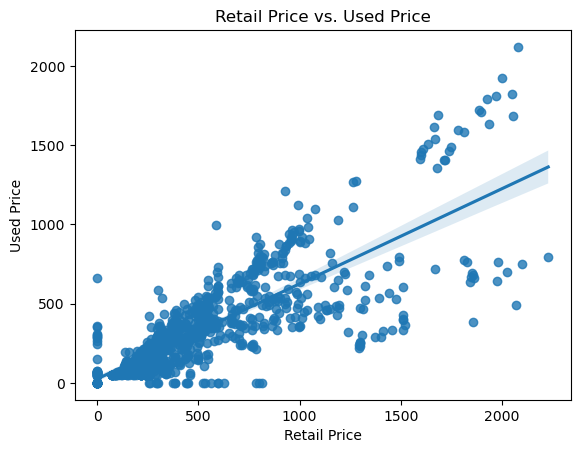

In [24]:
#regression plot as evidence that retail price influences used price
#used price and retail price have a positively increasing relationship

sns.regplot(x='Retail Price', y='Used Price', data=df3)
plt.title('Retail Price vs. Used Price')

Text(0.5, 1.0, 'Retail Price vs. Used Price')

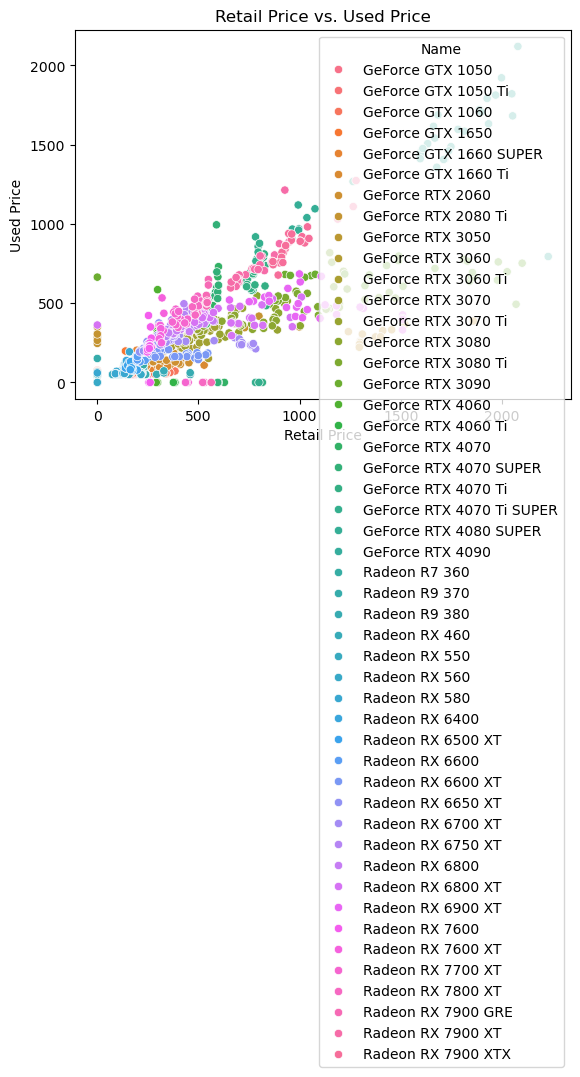

In [25]:
#getting a visual look of GPUs and their prices
sns.scatterplot(x='Retail Price', y='Used Price', hue='Name', data=df3)
plt.title('Retail Price vs. Used Price')

Text(0.5, 1.0, 'GPU Quality')

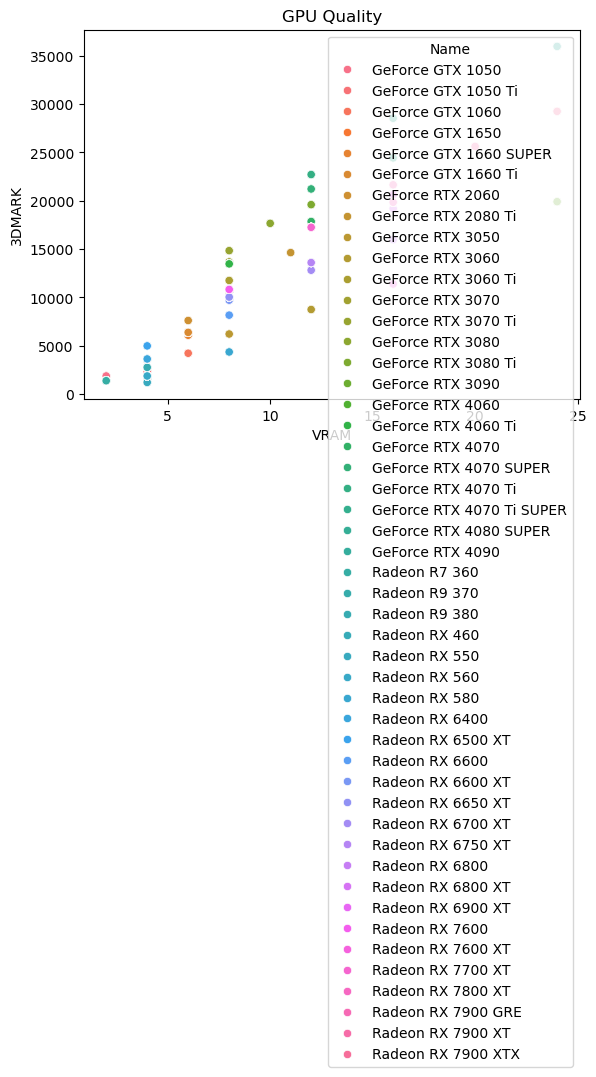

In [26]:
#visually seeing the strong relationship between VRAM and 3DMARK, the two important specs of GPUs

sns.scatterplot(x='VRAM', y='3DMARK', hue='Name', data=df3)
plt.title('GPU Quality')

<Axes: xlabel='Date', ylabel='Retail Price'>

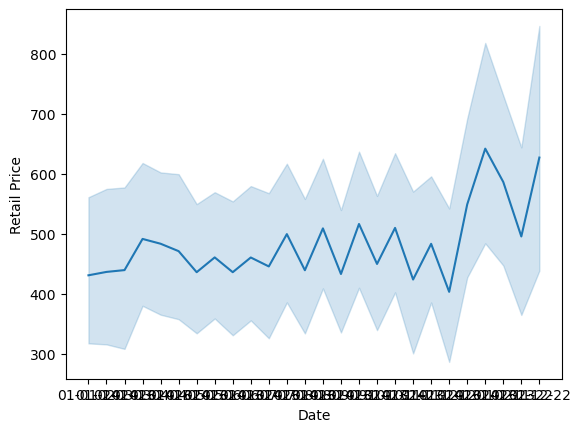

In [27]:
#comparing retail prices of GPUs over time
sns.lineplot(x='Date', y='Retail Price', data=df3)

<br> From the graph, the retail price increases over a long period of time, with many points in time where prices fall. <br/>

<br> This can hint at shifts in the market, changes in tech or global events. <br/>

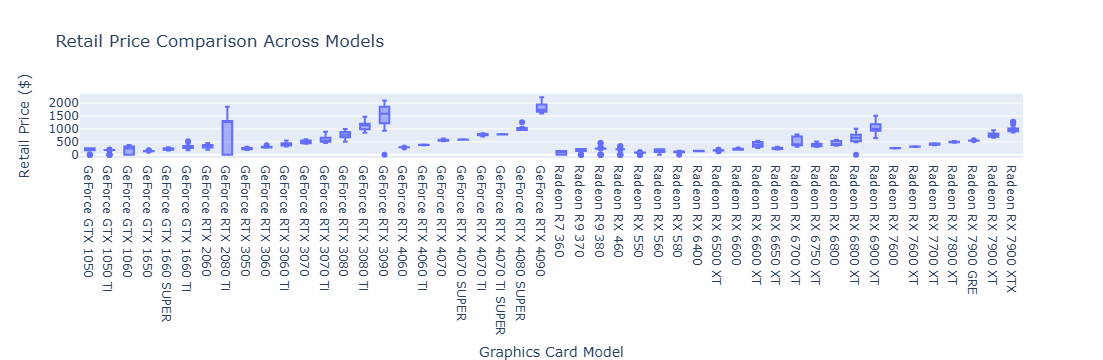

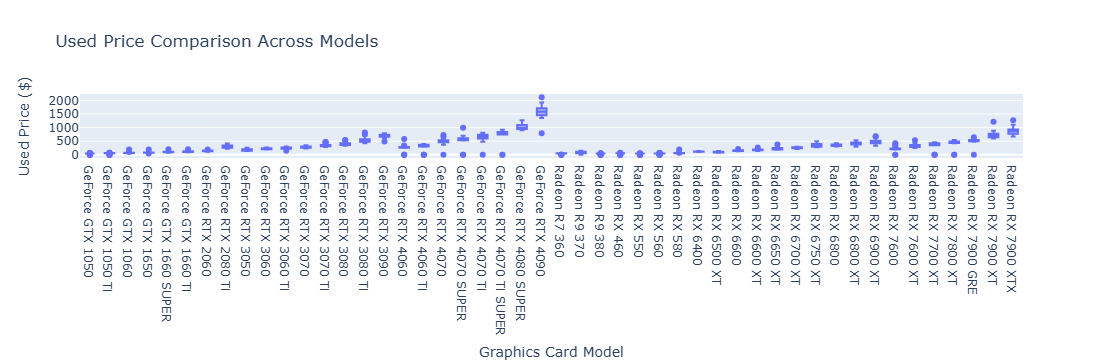

In [28]:
# Plot Retail vs Used Prices for all models of GPUs
fig = px.box(df3, x='Name', y='Retail Price', title='Retail Price Comparison Across Models', 
             labels={'Retail Price': 'Retail Price ($)', 'Name': 'Graphics Card Model'})
fig.show()

fig = px.box(df3, x='Name', y='Used Price', title='Used Price Comparison Across Models',
             labels={'Used Price': 'Used Price ($)', 'Name': 'Graphics Card Model'})
fig.show()

#the boxplot gives a visual for comparing the minimum and maximum prices of each GPU from both retail and used prices

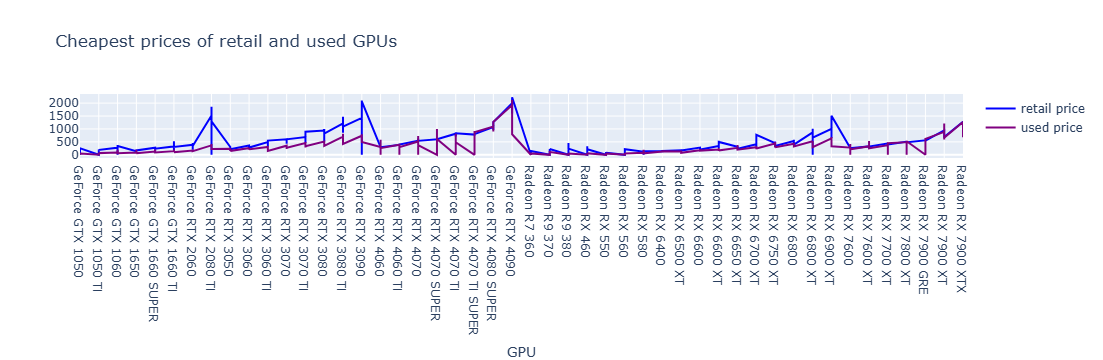

In [29]:
#we want to see what's the cheapest a GPU can be sold for

cheapest_retail_prices = go.Scatter(x = df3['Name'],
                                    y = df3['Retail Price'],
                                    mode = 'lines',
                                    name = 'retail price',
                                    marker = dict(color = 'blue')
                                   )

cheapest_used_prices = go.Scatter(x = df3['Name'],
                                    y = df3['Used Price'],
                                    mode = 'lines',
                                    name = 'used price',
                                    marker = dict(color = 'purple')
                                   )

layout = go.Layout(title={'text': "Cheapest prices of retail and used GPUs"},
                  xaxis = dict(title = 'GPU'))

fig = go.Figure(data = [cheapest_retail_prices, cheapest_used_prices], layout = layout)
iplot(fig)